Accuracy of SVM: 0.33


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


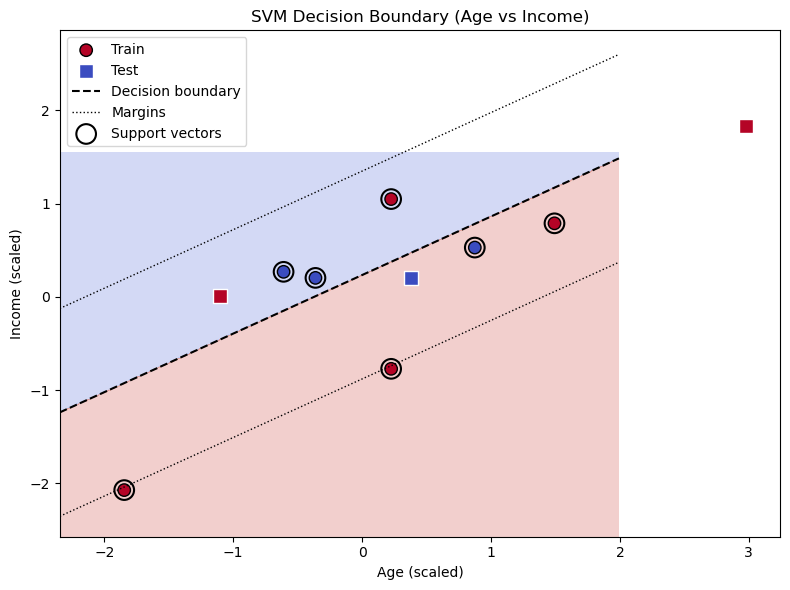

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ---------------------------------------------------
# 1. Dataset (exactly as provided)
# ---------------------------------------------------
data = {
    'Age':[23,45,np.nan,35,62,np.nan,41,29,33,50],
    'Income':[50000,60000,55000,np.nan,65000,62000,np.nan,58000,59000,61000],
    'Education_Level':['Bachelor','Master',np.nan,'PhD','Bachelor','Master','PhD',np.nan,'Bachelor','Master'],
    'Purchased':[1,0,1,0,1,1,0,1,0,1]
}

df = pd.DataFrame(data)

# ---------------------------------------------------
# 2. Handle missing values
# ---------------------------------------------------
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Income'] = df['Income'].fillna(df['Income'].mean())
df['Education_Level'] = df['Education_Level'].fillna('Unknown')

# ---------------------------------------------------
# 3. Encode categorical feature
# ---------------------------------------------------
le = LabelEncoder()
df['Education_Level'] = le.fit_transform(df['Education_Level'])

# ---------------------------------------------------
# 4. Features and target
# ---------------------------------------------------
X = df[['Age', 'Income', 'Education_Level']]
y = df['Purchased']

# ---------------------------------------------------
# 5. Train-test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ---------------------------------------------------
# 6. Scale Age and Income only
# ---------------------------------------------------
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Age','Income']] = scaler.fit_transform(
    X_train[['Age','Income']]
)
X_test_scaled[['Age','Income']] = scaler.transform(
    X_test[['Age','Income']]
)

# ---------------------------------------------------
# 7. Train linear SVM (2D: Age vs Income)
# ---------------------------------------------------
model = SVC(kernel='linear')
model.fit(X_train_scaled[['Age','Income']], y_train)

# ---------------------------------------------------
# 8. Evaluate
# ---------------------------------------------------
y_pred = model.predict(X_test_scaled[['Age','Income']])
print(f"Accuracy of SVM: {accuracy_score(y_test, y_pred):.2f}")

# ---------------------------------------------------
# 9. Plot decision boundary, margins, support vectors
# ---------------------------------------------------
plt.figure(figsize=(8,6))

x_min, x_max = X_train_scaled['Age'].min() - 0.5, X_train_scaled['Age'].max() + 0.5
y_min, y_max = X_train_scaled['Income'].min() - 0.5, X_train_scaled['Income'].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.coolwarm)

# Training points
plt.scatter(
    X_train_scaled['Age'], X_train_scaled['Income'],
    c=y_train, cmap=plt.cm.coolwarm,
    edgecolors='k', s=80, label='Train'
)

# Test points
plt.scatter(
    X_test_scaled['Age'], X_test_scaled['Income'],
    c=y_test, cmap=plt.cm.coolwarm,
    edgecolors='white', marker='s', s=100, label='Test'
)

# Decision boundary
w = model.coef_[0]
b = model.intercept_[0]

x_vals = np.linspace(x_min, x_max, 200)
y_vals = -(w[0]/w[1]) * x_vals - b / w[1]
plt.plot(x_vals, y_vals, 'k--', linewidth=1.5, label='Decision boundary')

# Margins
margin = 1 / np.linalg.norm(w)
y_vals_up = y_vals + margin / abs(w[1])
y_vals_down = y_vals - margin / abs(w[1])

plt.plot(x_vals, y_vals_up, 'k:', linewidth=1, label='Margins')
plt.plot(x_vals, y_vals_down, 'k:', linewidth=1)

# Support vectors
sv = model.support_vectors_
plt.scatter(
    sv[:,0], sv[:,1],
    s=200, facecolors='none',
    edgecolors='k', linewidths=1.5,
    label='Support vectors'
)

plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.title('SVM Decision Boundary (Age vs Income)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
